# Autoencoder

## Feedforward

In [28]:
import matplotlib.pyplot as plt
import torch.optim as optim
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot_mpl
from torch.utils.data import Dataset, DataLoader
import math

In [29]:
transform = transforms.ToTensor()

'''
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])
'''

mnist_data = datasets.MNIST(root='./data', train = True, download = True, transform = transform)
data_loader = torch.utils.data.DataLoader(dataset = mnist_data,
                                          batch_size = 64,
                                          shuffle = True)

In [30]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))
images.shape

tensor(0.) tensor(1.)


torch.Size([64, 1, 28, 28])

In [33]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # N, 3
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28), # N, 3
            nn.Sigmoid()
    )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [34]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [36]:
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28*28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch + 1}, Loss: {loss.item():.3f}")
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.055
Epoch: 2, Loss: 0.046
Epoch: 3, Loss: 0.037
Epoch: 4, Loss: 0.039
Epoch: 5, Loss: 0.034
Epoch: 6, Loss: 0.036
Epoch: 7, Loss: 0.037
Epoch: 8, Loss: 0.035
Epoch: 9, Loss: 0.033
Epoch: 10, Loss: 0.039


In [40]:
outputs[0][1], outputs[0][2]


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0.0003, 0.0004, 0.0005,  ..., 0.0004, 0.0004, 0.0004],
         [0.0149, 0.0155, 0.0149,  ..., 0.0148, 0.0148, 0.0156],
         [0.0125, 0.0120, 0.0125,  ..., 0.0128, 0.0129, 0.0121],
         ...,
         [0.0013, 0.0009, 0.0012,  ..., 0.0013, 0.0016, 0.0016],
         [0.0027, 0.0021, 0.0028,  ..., 0.0028, 0.0028, 0.0024],
         [0.0006, 0.0003, 0.0004,  ..., 0.0005, 0.0008, 0.0009]],
        grad_fn=<SigmoidBackward0>))

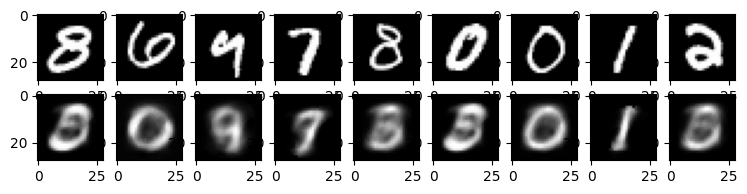

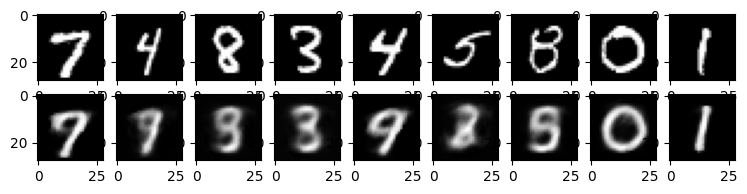

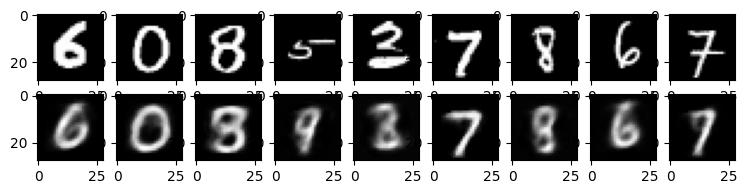

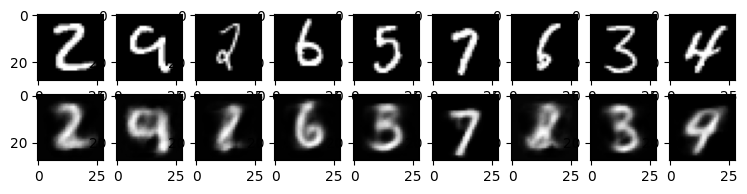

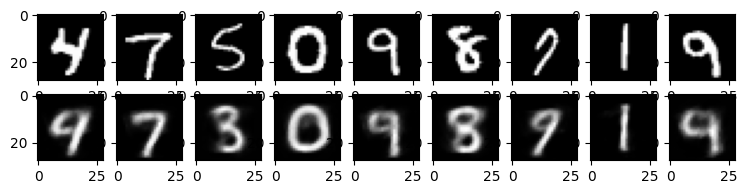

In [45]:
for j in range(0,num_epochs, 2):
    plt.figure(figsize = (9,4))
    plt.gray()
    imgs = outputs[j][1].detach().numpy()
    recon = outputs[j][2].detach().numpy()

    for i, item in enumerate(imgs):
            if i >= 9: break
            plt.subplot(4,9, i+1)
            item = item.reshape(-1, 28, 28)

            plt.imshow(item[0])
    for i, item in enumerate(recon):
            if i >= 9: break
            plt.subplot(4,9, 9+i+1)
            item = item.reshape(-1, 28, 28)

            plt.imshow(item[0])

In [50]:
[print(i) for i in range(0,10, 2)]

0
2
4
6
8


[None, None, None, None, None]

## Autoencoder convolucional

In [64]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding= 1), # N, 16, 14, 14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding= 1), # N, 32, 7, 7
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride = 2, padding = 1, output_padding= 1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride = 2, padding = 1, output_padding= 1),
            nn.Sigmoid()
    )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [65]:
model = ConvAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

In [67]:
num_epochs = 3
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch + 1}, Loss: {loss.item():.3f}")
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.004
Epoch: 2, Loss: 0.004
Epoch: 3, Loss: 0.003


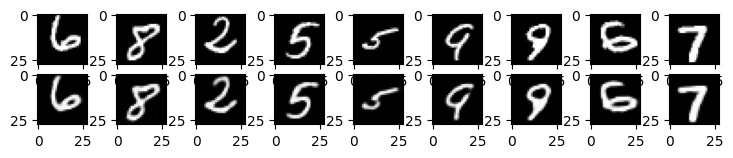

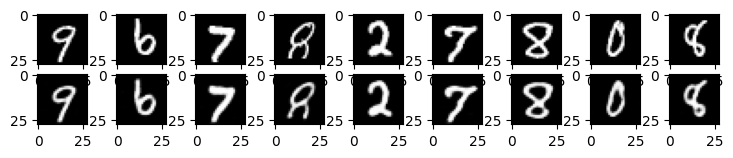

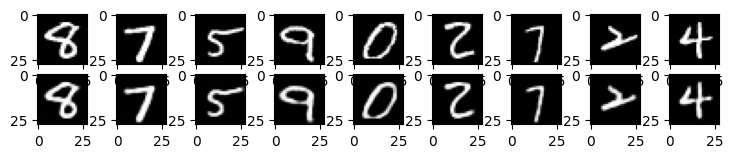

In [68]:
for j in range(num_epochs):
    plt.figure(figsize = (9,3))
    plt.gray()
    imgs = outputs[j][1].detach().numpy()
    recon = outputs[j][2].detach().numpy()

    for i, item in enumerate(imgs):
            if i >= 9: break
            plt.subplot(4,9, i+1)
            item = item.reshape(-1, 28, 28)

            plt.imshow(item[0])
    for i, item in enumerate(recon):
            if i >= 9: break
            plt.subplot(4,9, 9+i+1)
            item = item.reshape(-1, 28, 28)

            plt.imshow(item[0])